# Simple Linear Regression

In [48]:
#import library
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

1.Business Objective : To predict the home price based on the area provided.

Dataset details:
    The dataset  consists of two variables
    x = Area of the House,
    Y=Price of the house

In [49]:
house_data =pd.read_csv('homeprices.csv')

In [50]:
house_data.head()


,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [51]:
house_data.shape

(5, 2)

In [52]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    5 non-null      int64
 1   price   5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


Text(0, 0.5, 'Price(US $)')

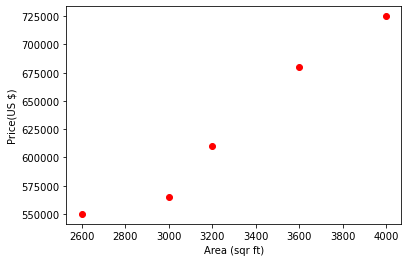

In [53]:
plt.scatter(house_data.area,house_data.price,color='red')
plt.xlabel('Area (sqr ft)')
plt.ylabel('Price(US $)')


In [54]:
house_data.corr()

,area,price
area,1.000000,0.978994
price,0.978994,1.000000


From the above visualiztion we can say the  area and price have positive linear relationship with corelation coefficient of 0.979

Model Building 

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lm = LinearRegression()
lm.fit(house_data[['area']],house_data[['price']])

LinearRegression()

In [57]:
lm.predict([[3600]])

array([[669452.05479452]])

In [58]:
house_data['area']

0    2600
1    3000
2    3200
3    3600
4    4000
Name: area, dtype: int64

In [70]:
m=lm.coef_
m[0][0]

135.78767123287673

In [68]:
c=lm.intercept_
c[0]

180616.43835616432

y=mX+c (m=slope,c=intercept)

y= 135.78767123 *X+180616.43835616

The above represent the line equation for our data

In [61]:
Y_pred = lm.predict(house_data[['area']])

In [62]:
house_data['Price_Pred']=Y_pred
house_data

,area,price,Price_Pred
0,2600,550000,533664.383562
1,3000,565000,587979.452055
2,3200,610000,615136.986301
3,3600,680000,669452.054795
4,4000,725000,723767.123288


In [66]:
R_Square=lm.score(house_data[['area']],house_data[['price']])
R_Square

0.9584301138199486

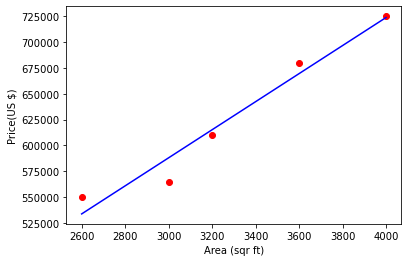

In [67]:
plt.scatter(house_data.area,house_data.price,color='red')
plt.xlabel('Area (sqr ft)')
plt.ylabel('Price(US $)')
plt.plot(house_data.area,house_data['Price_Pred'],color='blue')

In [71]:
from sklearn.metrics import mean_squared_error

In [74]:
mse = mean_squared_error(house_data.price,house_data['Price_Pred'])
mse

186815068.4931509

In [77]:
import math
rmse =math.sqrt(mse)
rmse

13668.030893042014

In [80]:
data_canada=pd.read_csv('canada_per_capita_income.csv')
data_canada.columns

Index(['year', 'per capita income (US$)'], dtype='object')

Text(0, 0.5, 'per capita income (US$)')

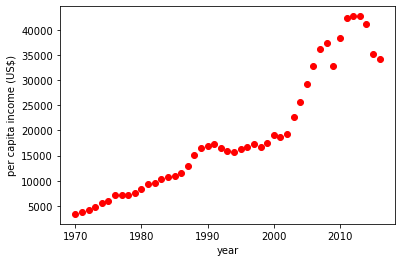

In [82]:
plt.scatter(data_canada.year,data_canada['per capita income (US$)'],color='red')
plt.xlabel('year')
plt.ylabel('per capita income (US$)')


In [85]:
data_canada.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [84]:
data_canada.corr()

,year,per capita income (US$)
year,1.000000,0.943884
per capita income (US$),0.943884,1.000000


From the scatter plot we can say that year wise the per capita income of US is increasing 

Model Building

In [90]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(data_canada[['year']],data_canada['per capita income (US$)'])


LinearRegression()

In [92]:
lm.predict([[1971]])

array([693.9054085])

In [95]:
m=lm.coef_
m[0]

828.4650752227104

In [97]:
c=lm.intercept_
c

-1632210.7578554575

y=mX+c (m=slope,c=intercept)
y=  828.46*X-1632210.7578

In [101]:
Y_pred=lm.predict(data_canada[['year']])

In [104]:
data_canada['Income_Pred']=Y_pred
data_canada.head(3)

,year,per capita income (US$),Income_Pred
0,1970,3399.299037,-134.559667
1,1971,3768.297935,693.905409
2,1972,4251.175484,1522.370484


In [105]:
R_Square=lm.score(data_canada[['year']],data_canada[['per capita income (US$)']])
R_Square

0.890916917957032

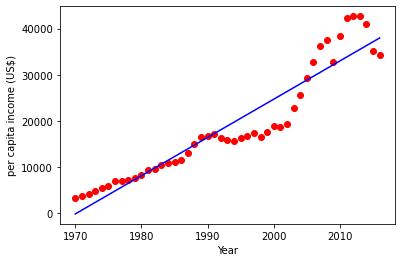

In [107]:
plt.scatter(data_canada.year,data_canada['per capita income (US$)'],color='red')
plt.xlabel('Year')
plt.ylabel('per capita income (US$)')
plt.plot(data_canada.year,data_canada['Income_Pred'],color='blue')

In [108]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(house_data.price,house_data['Price_Pred'])
mse

186815068.4931509

In [109]:

import math
rmse =math.sqrt(mse)
rmse

13668.030893042014

In [112]:
lm.predict([[2017]])

array([38803.29886875])

In [116]:
lm.predict([[2018]])

array([39631.76394397])

In [115]:
lm.predict([[2019]])

array([40460.22901919])

In [114]:
lm.predict([[2020]])

array([41288.69409442])

In [117]:
income_2020 = lm.predict([[2020]])[0]
income_2020

41288.69409441762